# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

import warnings # ignore warnings
warnings.simplefilter("ignore")      #Assign predictors & target
from sklearn import preprocessing     

from sklearn.model_selection import train_test_split # Split data

#Models
from sklearn import model_selection
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler   # Feature Scaling for RF



from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

import sklearn 
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Get the Data:
- Use pandas to read 'final_data.csv' as a dataframe called dataframe.

In [3]:
dataframe = pd.read_csv('Features_Selection.csv')
dataframe.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,earliest_cr_line,revol_util,out_prncp,out_prncp_inv,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation
0,0,10000,10000,10000,12.40,224.48,Feb-97,49.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,15000,15000,15000,17.97,380.66,Mar-07,48.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2,35000,35000,35000,13.08,797.80,Jul-05,66.7,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,3,17500,17500,17500,17.19,625.58,Jun-06,83.6,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,4,13750,13750,13750,28.80,574.71,Apr-90,87.6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Drop others purposes

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 24 columns):
Unnamed: 0                    4757 non-null int64
loan_amnt                     4757 non-null int64
funded_amnt                   4757 non-null int64
funded_amnt_inv               4757 non-null int64
int_rate                      4757 non-null float64
installment                   4757 non-null float64
earliest_cr_line              4757 non-null object
revol_util                    4743 non-null float64
out_prncp                     4757 non-null float64
out_prncp_inv                 4757 non-null float64
total_rec_int                 4757 non-null float64
last_pymnt_amnt               4757 non-null float64
purpose_car                   4757 non-null int64
purpose_credit_card           4757 non-null int64
purpose_debt_consolidation    4757 non-null int64
purpose_home_improvement      4757 non-null int64
purpose_house                 4757 non-null int64
purpose_major_purchase      

In [5]:
# drop columns
dataframe.drop(['purpose_car', 'purpose_debt_consolidation','purpose_home_improvement', 'purpose_house','purpose_major_purchase','purpose_medical','purpose_moving','purpose_other',
                'purpose_renewable_energy','purpose_small_business','purpose_vacation'], axis=1, inplace=True)

In [6]:
# drop columns
dataframe.drop(['earliest_cr_line'], axis=1, inplace=True)
dataframe.drop(['revol_util'], axis=1, inplace=True)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 11 columns):
Unnamed: 0             4757 non-null int64
loan_amnt              4757 non-null int64
funded_amnt            4757 non-null int64
funded_amnt_inv        4757 non-null int64
int_rate               4757 non-null float64
installment            4757 non-null float64
out_prncp              4757 non-null float64
out_prncp_inv          4757 non-null float64
total_rec_int          4757 non-null float64
last_pymnt_amnt        4757 non-null float64
purpose_credit_card    4757 non-null int64
dtypes: float64(6), int64(5)
memory usage: 408.9 KB


# Check if target is balanced:

In [8]:
dataframe['purpose_credit_card'].value_counts()

0    3767
1     990
Name: purpose_credit_card, dtype: int64

# Balancing Data by under sampling the majority class

In [9]:
ChargedOff_df=dataframe[dataframe["purpose_credit_card"]==1]
Paid_df = dataframe[dataframe["purpose_credit_card"]==0]
Paid_df_sample=Paid_df.sample(n=990, random_state=0)
frames = [ChargedOff_df,Paid_df_sample]
BalancedData = pd.concat(frames)
BalancedRandomData = BalancedData.sample(frac=1).reset_index(drop=True)
BalancedRandomData['purpose_credit_card'].value_counts()

1    990
0    990
Name: purpose_credit_card, dtype: int64

# Assign predictors and target (x,y)

In [10]:
y=BalancedRandomData['purpose_credit_card']
X = BalancedRandomData.drop('purpose_credit_card', axis=1)

# Split Data to train and test


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [12]:
X_train.shape

(1584, 10)

In [13]:
X_test.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,out_prncp,out_prncp_inv,total_rec_int,last_pymnt_amnt
215,2142,6500,6500,6500,15.02,225.39,0.00,0.00,40.68,6546.10
161,1728,20000,20000,20000,8.81,634.23,0.00,0.00,6.36,20030.83
135,1308,17500,17500,17500,8.19,356.44,0.00,0.00,9.16,17525.08
386,2188,12100,12100,12100,23.40,470.92,11627.77,11627.77,453.88,470.92
674,1912,5000,5000,5000,11.31,164.43,4764.28,4764.28,90.00,164.43


In [14]:
y_train.head()

251     1
1275    1
1303    1
190     1
1819    0
Name: purpose_credit_card, dtype: int64

In [15]:
y_test.shape

(396,)

# Fitting Random Forest model
- find accuarcy of training, testing and prediction

In [17]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
preds = clf.predict(X_test)

In [19]:
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,123,85
1,94,94


In [47]:
#2 

# Feature Scaling (Normalize x)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#RF
clf=RandomForestClassifier(n_estimators=300)

clf.fit(X_train,y_train)

# Make predictions on test data
y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5505050505050505


In [53]:
model2 = RandomForestClassifier(n_estimators=300,max_depth=800)
model2.fit(X_train,y_train)
predictions2 = model2.predict(X_test)

print(('Testing Accuracy: %.5f') % (accuracy_score(y_test, predictions2)))
print(('Training Accuracy: %.5f') % (accuracy_score(y_train, model2.predict(X_train))))
print()

Testing Accuracy: 0.56061
Training Accuracy: 1.00000



In [54]:
kfold = model_selection.KFold(n_splits=6, random_state=0)
scoring = 'roc_auc'
results = model_selection.cross_val_score(model2, X, y, cv=kfold, scoring='roc_auc')
print(("AUC for random forest model: %.3f (%.3f)") % (results.mean(), results.std()))

AUC for random forest model: 0.599 (0.027)


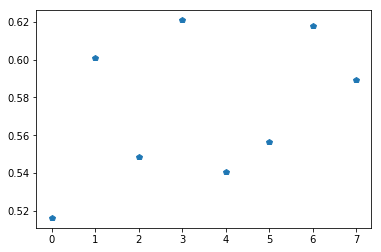

In [57]:
RandomForestCV2 = model_selection.cross_val_score(model2,X,y,cv=8)
plt.plot(RandomForestCV2,"p")

In [58]:
print(RandomForestCV2.mean())

0.5737976986624704


In [95]:
RF = RandomForestClassifier(n_estimators=300, criterion='gini' , random_state=0)  
RF.fit(X_train,y_train)
all_accuracies = cross_val_score(estimator=RF, X= X_train, y=y_train, cv=10) 
print(all_accuracies)  
print(all_accuracies.std())  
print(all_accuracies.mean())

[0.99371069 0.98742138 1.         0.99371069 1.         1.
 0.98742138 0.98726115 0.99363057 0.98726115]
0.005258338120523943
0.9930417017185433


# SVM Model

In [21]:
SVM = DecisionTreeClassifier()
SVM.fit(X_train,y_train)
predicte = model.predict(X_test)


In [22]:
print(('Testing Accuracy: %.5f') % (accuracy_score(y_test, predicte)))
print(('Training Accuracy: %.5f') % (accuracy_score(y_train, SVM.predict(X_train))))
print()

Testing Accuracy: 0.52778
Training Accuracy: 1.00000



In [25]:
# Model Accuracy, how often is the classifier correct?

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicte))

Accuracy: 0.5277777777777778


In [ ]:
#2 SVM

In [ ]:
# using grid search for Support Veector Machine
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
model = SVC()
grid = GridSearchCV(model, param_grid, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(train_features, train_target)
print(grid.best_score_)
print(grid.best_estimator_.kernel)
print(grid.best_estimator_.C)
print(grid.best_estimator_.gamma) 